In [ ]:
import pandas as pd
import numpy as np
import tensorflow, keras

from keras.layers import Dense, Embedding, Input, GRU, Bidirectional, LeakyReLU, Multiply, Concatenate, merge
from keras.models import Model

In [ ]:
num_words = 256


input_1 = Input(shape=(None, ))

emb = Embedding(input_dim = num_words+1 , output_dim = 200)(input_1)

bigru_1 = Bidirectional(GRU(256, return_sequences=True))(emb)

dense_1 = Dense(256)(bigru_1)

dense_hidden_1 = Dense(128, activation='relu')(dense_1)

dense_hidden_2 = Dense(256, activation=LeakyReLU(alpha=0.1))(dense_hidden_1)

# emb_2 = Concatenate([dense_1, dense_hidden_2])
# inputs=Concatenate[dense_1, dense_hidden_2]
bigru_2 = Bidirectional(GRU(256))(dense_hidden_2)

# dense_concat = Dense(256)(bigru_2)

input_ran = Input(shape=(256, )) # -- all events in a sentence input

concat = Concatenate()([bigru_2, input_ran])

dense_3 = Dense(256)(concat)

dense_hidden_3 = Dense(128, activation='relu')(dense_3)

dense_hidden_4 = Dense(256, activation=LeakyReLU(alpha=0.1))(dense_hidden_3)

output_1 = Dense(256, activation='sigmoid')(dense_hidden_4)

# input_2 = Input(shape=(256, ))
# output_2 = Multiply()([input_2, output_1])

model = Model(
    inputs=[input_1, input_ran],
    outputs=[output_1]
)

model.summary()

/usr/local/lib/python3.6/dist-packages/keras/activations.py:235: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


Model: "model_24"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_120 (InputLayer)          (None, None)         0                                            
__________________________________________________________________________________________________
embedding_78 (Embedding)        (None, None, 200)    51400       input_120[0][0]                  
__________________________________________________________________________________________________
bidirectional_132 (Bidirectiona (None, None, 512)    701952      embedding_78[0][0]               
__________________________________________________________________________________________________
dense_284 (Dense)               (None, None, 256)    131328      bidirectional_132[0][0]          
___________________________________________________________________________________________

In [ ]:
num_words = 256


input_1 = Input(shape=(None, ))

emb = Embedding(input_dim = num_words + 1, output_dim = 200)(input_1)

bigru_1 = Bidirectional(GRU(256, return_sequences=True))(emb)

dense_1 = Dense(256,)(bigru_1)

dense_hidden_1 = Dense(128, activation='relu')(dense_1)

dense_hidden_2 = Dense(256, activation=LeakyReLU(alpha=0.1))(dense_hidden_1)

bigru_2 = Bidirectional(GRU(256))(dense_hidden_2)

output_1 = Dense(256, activation='sigmoid')(bigru_2)

input_2 = Input(shape=(256, ))

output_2 = Multiply()([input_2, output_1])

model = Model(
    inputs=[input_1, input_2],
    outputs=[output_2],
)

model.summary()

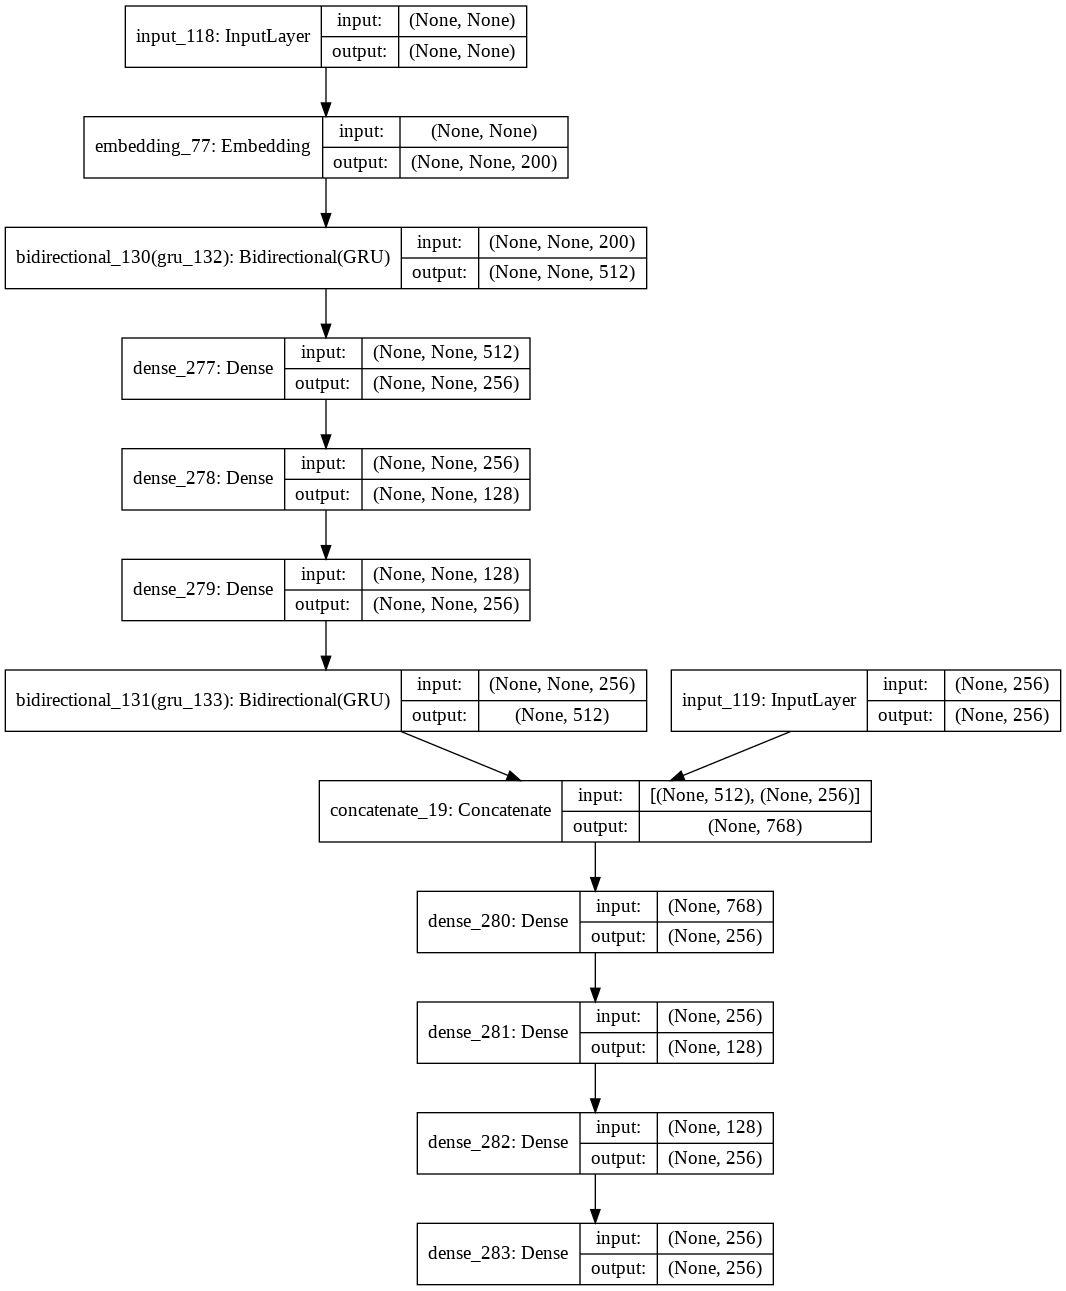

In [ ]:
keras.utils.plot_model(model, "model_creation.png", show_shapes=True)